**PROBLEM STATEMENT:**\
Binary classification of glass type.\
Scoring: log loss on probability.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import keras
import numpy as np
from sklearn.model_selection import cross_val_score
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [0]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [0]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


Checking data balancing:

In [0]:
train_ss['class'].value_counts(normalize=True)*100

1    65.316642
2    34.683358
Name: class, dtype: float64

Very basic data preprocessing and fitting a model:

In [0]:
numeric_train=train.iloc[:,2:10]
numeric_test=test.iloc[:,2:10]

In [0]:
#DATA STANDARDISATION:
# Define the scaler 
SS = StandardScaler().fit(numeric_train)
columns=numeric_train.columns
# Scale the train set
numeric_train = SS.transform(numeric_train)
numeric_train = pd.DataFrame(numeric_train,columns=columns)
# Scale the test set
numeric_test = SS.transform(numeric_test)
numeric_test = pd.DataFrame(numeric_test,columns=columns)

In [0]:
numeric_train.head()

,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area
0,0.591354,-0.777115,-0.811333,-0.883497,-0.401060,-0.401011,-0.381579,-0.381681
1,-0.190164,-0.433562,1.105034,1.075244,0.404473,0.404769,-0.410242,-0.410316
2,-0.141319,-0.252745,0.733259,0.719473,-0.349742,-0.350704,-0.417798,-0.417895
3,-0.727458,-0.795196,-1.008719,-0.787559,0.025582,0.025578,1.276687,1.276759
4,0.005215,-0.180418,-0.201928,-0.295875,-0.321791,-0.322674,-0.430566,-0.430589


In [0]:
train_ss=pd.concat([numeric_train,train.drop(columns,axis=1)],axis=1)
test_ss=pd.concat([numeric_test,test.drop(columns,axis=1)],axis=1)

In [0]:
X=train_ss.drop('class',axis=1)
Y=train_ss['class']

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400)

In [0]:
cv=cross_val_score(rfc,X,Y,cv=4)
print(cv)
print(cv.mean())
print(cv.std())

[0.82941176 0.87352941 0.83480826 0.84070796]
0.8446143501648447
0.017165507948708567


In [0]:
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rfc.predict_proba(test_ss)
print(predictions)

[[0.9925 0.0075]
 [0.18   0.82  ]
 [0.8725 0.1275]
 ...
 [0.9925 0.0075]
 [0.7075 0.2925]
 [0.9725 0.0275]]


In [0]:
submit = pd.DataFrame(predictions,columns=[1,2])
submit.to_csv('submit_1.csv')

Log loss score after first submission: 0.2961

Deep learning Model:

In [0]:
from keras.models import Sequential
from keras.layers import Dense

wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(16, activation='relu', input_shape=(15,)))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(1, activation='sigmoid'))

wtp_dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = wtp_dnn_model.fit(X, Y, epochs=10, batch_size=5, 
                            shuffle=True, validation_split=0.1, verbose=1)

Train on 1222 samples, validate on 136 samples
Epoch 1/10
1222/1222 [==============================] - 2s 2ms/step - loss: -7.4471 - accuracy: 0.6530 - val_loss: -37.0278 - val_accuracy: 0.6544
Epoch 2/10
1222/1222 [==============================] - 1s 618us/step - loss: -281.9089 - accuracy: 0.6530 - val_loss: -871.9610 - val_accuracy: 0.6544
Epoch 3/10
1222/1222 [==============================] - 1s 620us/step - loss: -2409.6369 - accuracy: 0.6530 - val_loss: -5289.7061 - val_accuracy: 0.6544
Epoch 4/10
1222/1222 [==============================] - 1s 619us/step - loss: -9481.3682 - accuracy: 0.6530 - val_loss: -17051.2673 - val_accuracy: 0.6544
Epoch 5/10
1222/1222 [==============================] - 1s 606us/step - loss: -25744.3151 - accuracy: 0.6530 - val_loss: -40926.8465 - val_accuracy: 0.6544
Epoch 6/10
1222/1222 [==============================] - 1s 623us/step - loss: -55667.6749 - accuracy: 0.6530 - val_loss: -82545.2581 - val_accuracy: 0.6544
Epoch 7/10
1222/1222 [===========

**Convert Dummy encoded categorical variable to label encoded. Try to increase validation accuracy in the neural network.** This is also the part of data-preprocessing.

CONVERTING TRAIN DATA:

In [0]:
df1=((train.drop(columns,axis=1)).drop('class',axis=1))[['grade_A_Component_1','grade_A_Component_2']]
df2=((train.drop(columns,axis=1)).drop(['class','grade_A_Component_1','grade_A_Component_2'],axis=1))
df1.head()

,grade_A_Component_1,grade_A_Component_2
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [0]:
df1['grade_A_component']=99
df1.loc[df1['grade_A_Component_1']==1, 'grade_A_component'] = 0
df1.loc[df1['grade_A_Component_2']==1, 'grade_A_component'] = 1
df1=df1['grade_A_component']

In [0]:
df2['x_component']=0
df2.loc[df2['x_component_1']==1, 'x_component'] = 1
df2.loc[df2['x_component_2']==1, 'x_component'] = 2
df2.loc[df2['x_component_3']==1, 'x_component'] = 3
df2.loc[df2['x_component_4']==1, 'x_component'] = 4
df2.loc[df2['x_component_5']==1, 'x_component'] = 5
df2=df2['x_component']

In [0]:
train_ss=pd.concat([numeric_train,df1,df2,train['class']],axis=1)
train_ss.head()

,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,grade_A_component,x_component,class
0,0.591354,-0.777115,-0.811333,-0.883497,-0.401060,-0.401011,-0.381579,-0.381681,1,3,1
1,-0.190164,-0.433562,1.105034,1.075244,0.404473,0.404769,-0.410242,-0.410316,0,1,1
2,-0.141319,-0.252745,0.733259,0.719473,-0.349742,-0.350704,-0.417798,-0.417895,0,0,2
3,-0.727458,-0.795196,-1.008719,-0.787559,0.025582,0.025578,1.276687,1.276759,1,3,1
4,0.005215,-0.180418,-0.201928,-0.295875,-0.321791,-0.322674,-0.430566,-0.430589,0,0,2


CONVERTING TEST DATA TO LABEL ENCODED:

In [0]:
df1=test.drop(columns,axis=1)[['grade_A_Component_1','grade_A_Component_2']]

In [0]:
df2 = ((test.drop(columns,axis=1)).drop(['grade_A_Component_1','grade_A_Component_2'],axis=1))

In [0]:
df1['grade_A_component']=99
df1.loc[df1['grade_A_Component_1']==1, 'grade_A_component'] = 0
df1.loc[df1['grade_A_Component_2']==1, 'grade_A_component'] = 1
df1=df1['grade_A_component']

In [0]:
df2['x_component']=0
df2.loc[df2['x_component_1']==1, 'x_component'] = 1
df2.loc[df2['x_component_2']==1, 'x_component'] = 2
df2.loc[df2['x_component_3']==1, 'x_component'] = 3
df2.loc[df2['x_component_4']==1, 'x_component'] = 4
df2.loc[df2['x_component_5']==1, 'x_component'] = 5
df2=df2['x_component']

In [0]:
test_ss=pd.concat([numeric_test,df1,df2],axis=1)
test_ss.head()

,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,grade_A_component,x_component
0,-0.727458,-0.252745,-1.024050,-1.119346,-0.007690,-0.007452,-0.331289,-0.331315,0,2
1,0.982113,0.362034,-0.847744,-0.963446,-0.827137,-0.827337,-0.386269,-0.386155,1,0
2,-0.873993,-0.795196,-0.964642,-1.077373,6.372309,6.372197,-0.425094,-0.425167,1,1
3,-0.385544,-0.722869,-0.978057,-0.873504,-0.759761,-0.759099,0.367038,0.366990,1,3
4,0.200595,-0.071927,-1.043213,-1.069378,2.086191,2.085672,-0.271358,-0.271356,0,0


INITIALISING MODELS to check improvement in label encoded data. We will ditch the deep learning model because as it is the accuracy is very less on subsets.

In [0]:
X=train_ss.drop('class',axis=1)
Y=train_ss['class']

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400)

cv=cross_val_score(rfc,X,Y,cv=4)
print(cv)
print(cv.mean())
print(cv.std())

[0.84705882 0.88235294 0.84365782 0.84070796]
0.8534443866041992
0.0168409718480376


In [0]:
rfc.fit(X,Y)
rfc.feature_importances_

array([0.06914299, 0.12804515, 0.06867639, 0.06500789, 0.07445254,
       0.07503563, 0.07548082, 0.07302992, 0.03304094, 0.33808774])

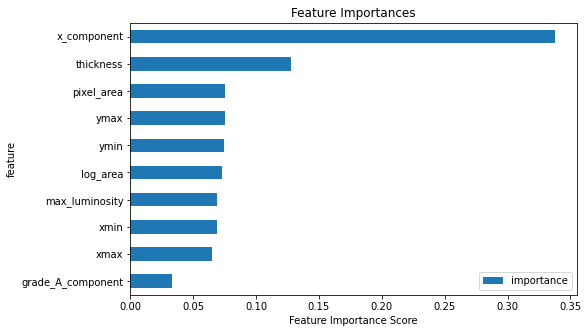

In [0]:
feat_imp = pd.DataFrame({'importance':rfc.feature_importances_})    
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(8,5))
plt.xlabel('Feature Importance Score')
plt.show()

Grade_A_component seems to be a less important feature. After plotting feature importance on Random Forest model fit. Trying to drop the feature and check for score. 

In [0]:
Xtrain=train_ss.drop(['grade_A_component','class'],axis=1)
Ytrain=train_ss['class']
Xtest=test_ss.drop('grade_A_component',axis=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=750)
rfc.fit(Xtrain,Ytrain)
predictions = rfc.predict_proba(Xtest)
print(predictions)
submit = pd.DataFrame(predictions,columns=[1,2])
submit.to_excel('submit_3.xlsx')

[[1.         0.        ]
 [0.26533333 0.73466667]
 [0.964      0.036     ]
 ...
 [1.         0.        ]
 [0.81333333 0.18666667]
 [0.996      0.004     ]]


**Updated Score: 0.27100 Significant improvent due to data preprocessing and feature updation by checking important features. Next step is checking for data transformation, better algorithms, hyperparameter tuning and oversampling.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


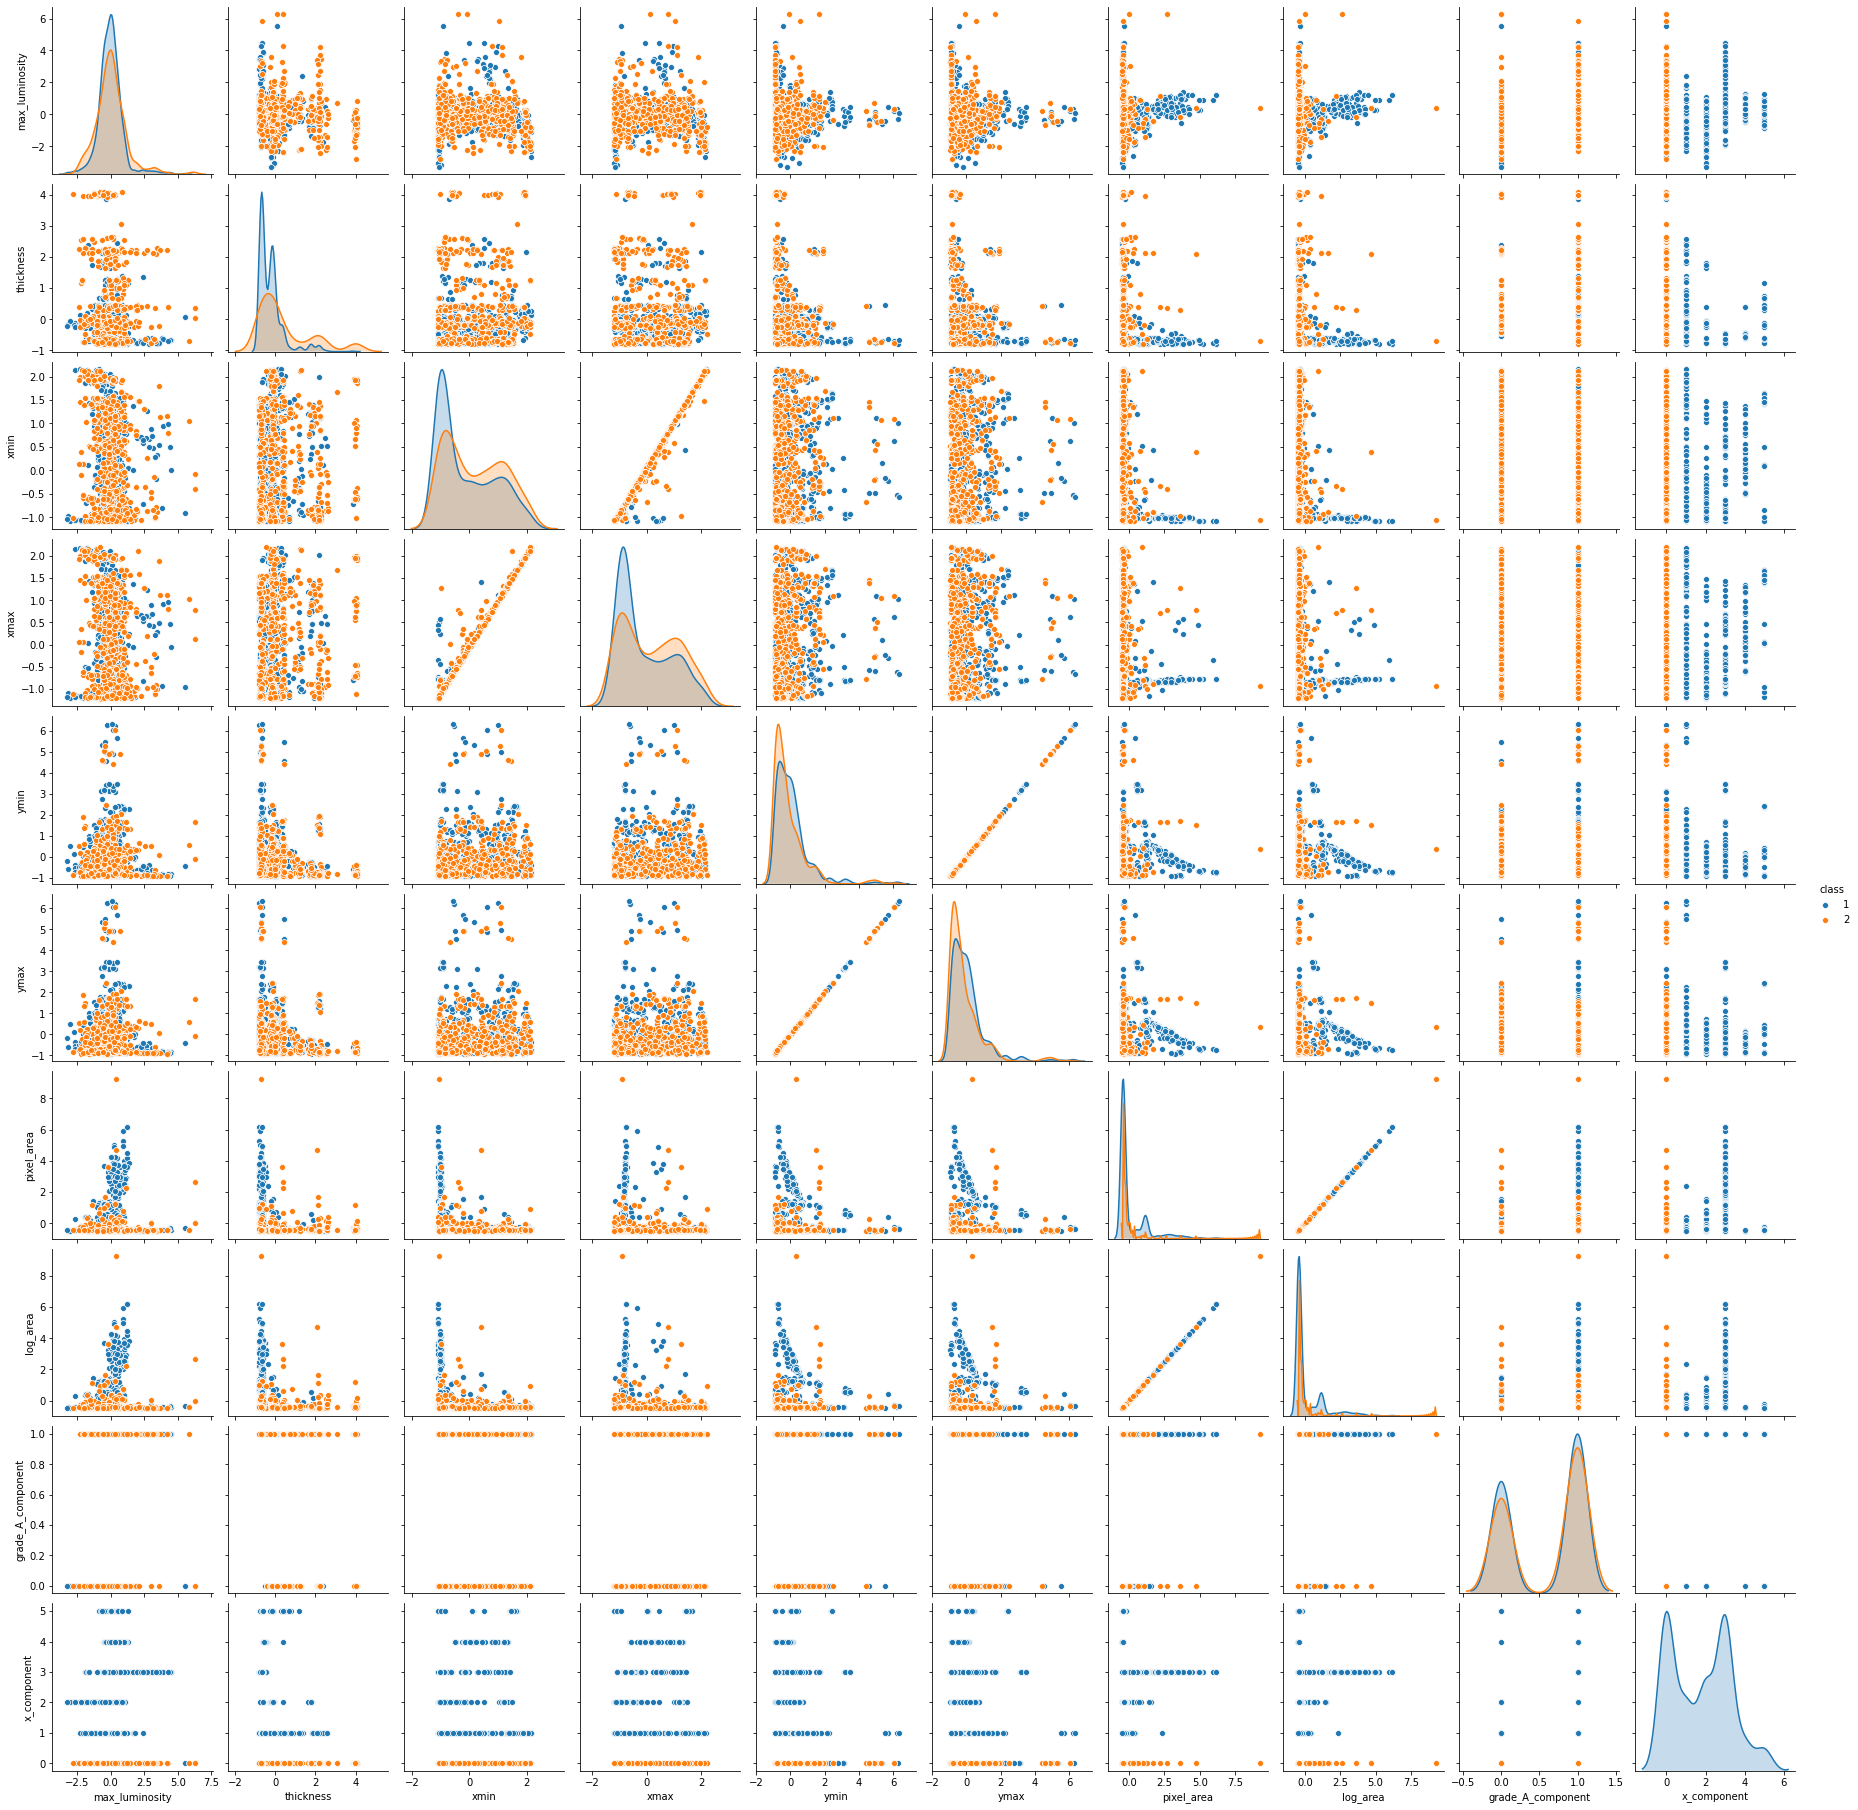

In [0]:
sns.pairplot(train_ss,hue='class',diag_kind='kde')

From the pair plot we can find column with redundant information like 'xmin' and 'xmax' , 'ymin' and 'ymax' also 'pixel_area' and 'log_area' to some extent. We can also spot why x_component is a very important feature and 'grade_A_component' varies very lightly according to glass class. We can try and drop features to check improvement.

In [0]:
Xtrain=train_ss.drop(['grade_A_component','log_area','xmax','ymax','class'],axis=1)
Ytrain=train_ss['class']
Xtest=test_ss.drop(['grade_A_component','log_area','xmax','ymax'],axis=1)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=550)
rfc.fit(Xtrain,Ytrain)
predictions = rfc.predict_proba(Xtest)
print(predictions)
submit = pd.DataFrame(predictions,columns=[1,2])
submit.to_excel('submit_4.xlsx')

[[0.99818182 0.00181818]
 [0.28363636 0.71636364]
 [0.96727273 0.03272727]
 ...
 [1.         0.        ]
 [0.82181818 0.17818182]
 [0.99454545 0.00545455]]


**Dropping features didnt yield a better result because of the fact the dataset is very small. Hence focusing on model comparisons**

Applying gradient boost classifier. XG boost, LGBM, EXTRATrees. Below is the sample code for comparison. Comparison was done manually but can be easily automated by creating a function and saving cross-validation scores and checking the highest. Gradient boosting was giving the best result. Hence final submission was done through Gradient Boost classifier after it's Hyper Parameter tuning.


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [0]:
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

Applying grid search:

In [0]:
clf=GradientBoostingClassifier()
parameters = {
    "n_estimators":[150,300,500],
    "learning_rate": [0.1,0.2,.3],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5,0.8, 1.0],
    }
clf = RandomizedSearchCV(gbc, parameters, random_state=1, n_iter=30, cv=3, verbose=0, n_jobs=-1)
clf.fit(X,Y)

Final Model:

In [0]:
Xtrain=train_ss.drop(['class'],axis=1)
Ytrain=train_ss['class']
Xtest=test_ss
gbc=GradientBoostingClassifier(learning_rate= 0.3,max_depth= 8,n_estimators=150,max_features='sqrt',subsample=0.8) #checking score after tuned hyperparameters
cv=cross_val_score(gbc,X,Y,cv=4)
cv
print(cv)
print(cv.mean())
print(cv.std())

[0.86176471 0.87647059 0.83480826 0.83775811]
0.8527004164497658
0.017252421179944858


In [0]:
gbc=GradientBoostingClassifier(learning_rate= 0.3,max_depth= 8,n_estimators=150,max_features='sqrt')
gbc.fit(X,Y)
predictions = gbc.predict_proba(test_ss)
print(predictions)
submit = pd.DataFrame(predictions,columns=[1,2])
submit.to_excel('submit_8.xlsx') 

[[9.99999733e-01 2.66929017e-07]
 [5.22130806e-03 9.94778692e-01]
 [9.99999695e-01 3.05007076e-07]
 ...
 [9.99995760e-01 4.24035859e-06]
 [9.99734949e-01 2.65050728e-04]
 [9.99997681e-01 2.31912529e-06]]


Best Score: 0.26586\
First score: 0.2961\
Final rank: 35/256 submissions\
Scope of improvement: Using better ensemble techniques and better parameter tuning.